# Imports

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.model_selection  import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np
import pandas as pd

# Reading CSV File 

In [2]:
# reading a CSV file directly from local device, and store it in a pandas DataFrame:
# "read_csv" is a pandas function to read csv files from web or local device:

read12 = pd.read_csv('C:/Users/rajat/Downloads/HW3/testLabel.csv')


test = pd.read_csv('C:/Users/rajat/Downloads/test.csv/test.csv')
train = pd.read_csv('C:/Users/rajat/Downloads/train.csv/train.csv')

test.shape

(75818, 370)

# Pre - Processing of Data

### Applying Feature Selection on Data

In [5]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
train_Selection =sel.fit_transform(train)

test_Selection =sel.fit_transform(test)


In [6]:
df_train = pd.DataFrame(train_Selection)
df_train.shape

(76020, 212)

In [7]:
df_test = pd.DataFrame(test_Selection)
df_test.shape

(75818, 205)

In [8]:
df_test.head(10)

,0,1,2,3,4,5,6,7,8,9,...,195,196,197,198,199,200,201,202,203,204
0,2.0,2.0,32.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,40532.10
1,5.0,2.0,35.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,45486.72
2,6.0,2.0,23.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,46993.95
3,7.0,2.0,24.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,187898.61
4,9.0,2.0,23.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,73649.73
5,11.0,2.0,43.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,53250.87
6,12.0,2.0,39.0,495.0,2334.42,4815.42,0.0,0.0,0.0,0.0,...,0.0,7077.51,0.0,7599.0,7338.27,0.0,0.0,0.0,0.0,58316.64
7,15.0,2.0,29.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,46898.49
8,16.0,2.0,53.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,110356.98
9,17.0,2.0,37.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,41366.49


In [9]:
df_train.head(10)

,0,1,2,3,4,5,6,7,8,9,...,202,203,204,205,206,207,208,209,210,211
0,1.0,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170
1,3.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030
2,4.0,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770
3,8.0,2.0,37.0,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970
4,10.0,2.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979
5,13.0,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,87975.750
6,14.0,2.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94956.660
7,18.0,2.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,251638.950
8,20.0,2.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101962.020
9,23.0,2.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,356463.060


# Decision Tree

In [28]:
y = read12['TARGET']
X_train, X_test, y_train, y_test = train_test_split(df_train,y, test_size=0.3, random_state=3)

decisionTree = DecisionTreeClassifier()
decisionTree.fit(X_train, y_train)

y_predict_dt = decisionTree.predict(X_test)
accuracyDt = accuracy_score(y_test, y_predict_dt)

print("Accuracy with Decision Tree ", accuracyDt)

Accuracy with Decision Tree  0.926642111725


In [30]:
from sklearn.cross_validation import cross_val_score

y = read12['TARGET']
decisionTree = DecisionTreeClassifier()

accuracy_list = cross_val_score(decisionTree, df_train, y, cv=10, scoring='accuracy')
accuracy_cv = accuracy_list.mean()

print("Decision Tree with Cross Validation ", accuracy_cv)

Decision Tree with Cross Validation  0.820362542708


#### Predicting values for testing set

In [11]:
decisionTree = DecisionTreeClassifier()
decisionTree.fit(train, y)
y_predict_dt = decisionTree.predict(test)
print(y_predict_dt)
re = pd.DataFrame(y_predict_dt)
re.to_csv('DecisionTreeResult', encoding='utf-8', index=False)

[0 0 0 ..., 1 0 0]


# Logistic Regression

In [31]:
y = read12['TARGET']
X_train, X_test, y_train, y_test = train_test_split(df_train,y, test_size=0.3, random_state=3)
logreg = LogisticRegression()

# training
logreg.fit(X_train, y_train)

# predict label
y_predict_lr = logreg.predict(X_test)

# calculate accuracy
log_accuracy = accuracy_score(y_test, y_predict_lr)

print('Accuracy with Logistic Regression : ', log_accuracy)

Accuracy with Logistic Regression :  0.960624397088


In [32]:
from sklearn.cross_validation import cross_val_score

yLog = read12['TARGET']
logreg = LogisticRegression()

accuracy_list = cross_val_score(logreg, df_train, y, cv=10, scoring='accuracy')
accuracy_cv = accuracy_list.mean()

print("Logistic Regression with Cross Validation ", accuracy_cv)

Logistic Regression with Cross Validation  0.960418314158


In [95]:
yLog = read12['TARGET']
logreg = LogisticRegression()

# training
logreg.fit(df_train, yLog)

# predict label
y_predict_lr = logreg.predict(test)


GB = pd.DataFrame(y_predict_lr)
GB.to_csv('LogisticRegressionResult', encoding='utf-8', index=False)

# Gradient Boosting

In [33]:
from sklearn.ensemble import GradientBoostingClassifier

y=read12['TARGET']
X_train, X_test, y_train, y_test = train_test_split(df_train, y, random_state=0)
clf = GradientBoostingClassifier(learning_rate= 1, max_depth=5,random_state=0)
clf.fit(X_train, y_train)



y_predict_dt = clf.predict(X_test)
accuracyDt = accuracy_score(y_test, y_predict_dt)

print("Accuracy with Gradient Boosting : ", accuracyDt)

Accuracy with Gradient Boosting :  0.954380426204


In [34]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

clf = GradientBoostingClassifier(learning_rate= 0.01, max_depth=2,random_state=0)


accuracy_list = cross_val_score(clf, df_train, y, cv=10, scoring='accuracy')

accuracy_gb = accuracy_list.mean()

print("Gradient Boosting with cross validation: ", accuracy_gb)

Gradient Boosting with cross validation:  0.960431468591


In [8]:
from sklearn.ensemble import GradientBoostingClassifier

y=read12['TARGET']
clf = GradientBoostingClassifier(learning_rate= 1, max_depth=5,random_state=0)
clf.fit(df_train, y)



y_predict_gb = clf.predict(test)


GB = pd.DataFrame(y_predict_gb)
GB.to_csv('GradientBoostingResult', encoding='utf-8', index=False)

# Neural Network 

In [35]:
from sklearn.neural_network import MLPClassifier
y=read12['TARGET']
X_train, X_test, y_train, y_test = train_test_split(df_train, y, random_state=0)

neuralClassifier = MLPClassifier(solver='lbfgs', alpha=5,hidden_layer_sizes=(10, 10), random_state=0)
neuralClassifier.fit(df_train, y)
y_predict =neuralClassifier.predict(X_test)
a = accuracy_score(y_test, y_predict)

print("Accuracy with Neural Networks : ", a)

Accuracy with Neural Networks :  0.960115759011


In [36]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

neuralClassifier = MLPClassifier(solver='lbfgs', alpha=5,hidden_layer_sizes=(5, 5), random_state=0)

accuracy_list = cross_val_score(neuralClassifier, train, y, cv=10, scoring='accuracy')

accuracy_gb = accuracy_list.mean()

print("Neural Network accuracy with Cross Validation: ", accuracy_gb)

Neural Network accuracy with Cross Validation:  0.960365694695


# K - Nearest Neighbors 

In [47]:
y=read12['TARGET']
X_train, X_test, y_train, y_test = train_test_split(df_train, y, random_state=0)
k=1000
my_knn = KNeighborsClassifier(n_neighbors=k)
my_knn.fit(X_train, y_train)
y_predict = my_knn.predict(X_test)
accuracyKnn = accuracy_score(y_test, y_predict)
print("Accuracy with K-Nearest Neighbors : " , accuracyKnn)

Accuracy with K-Nearest Neighbors :  0.960115759011


In [49]:
k=1000
my_knn = KNeighborsClassifier(n_neighbors=k)

accuracy_list = cross_val_score(my_knn, df_train, y, cv=10, scoring='accuracy')

accuracy_gb = accuracy_list.mean()

print("K-Nearest Neighbors with Cross Validation", accuracy_gb)

K-Nearest Neighbors with Cross Validation 0.960431468591


In [5]:
y=read12['TARGET']

k=1000
my_knn = KNeighborsClassifier(n_neighbors=k)
my_knn.fit(df_train, y)
y_predict = my_knn.predict(test)

KNN = pd.DataFrame(y_predict)
KNN.to_csv('KNNResult', encoding='utf-8', index=False)

# Random Forest

In [37]:
y = read12['TARGET']
X_train, X_test, y_train, y_test = train_test_split(df_train,y, test_size=0.3, random_state=5)

rf_model =  RandomForestClassifier(max_depth=10,n_estimators=10)
rf_model.fit(X_train, y_train)


# Scoring based on the train RF Model
predictions = rf_model.predict(X_test)
predictions
accuracyDt = rf_model.score(X_test,y_test)#, predictions)

print("Accuracy with Random Forest: ", accuracyDt)

Accuracy with Random Forest:  0.963036043147


In [38]:
rf_model =  RandomForestClassifier(max_depth=10,n_estimators=10)

accuracy_list = cross_val_score(rf_model, df_train, y, cv=10, scoring='accuracy')

accuracy_gb = accuracy_list.mean()

print("Random Forest with Cross Validation ", accuracy_gb)

Random Forest with Cross Validation  0.942487395767


In [104]:
y=read12['TARGET']

rf_model =  RandomForestClassifier(max_depth=10,n_estimators=10)
rf_model.fit(df_train, y)



y_predict_gb = rf_model.predict(test)


GB = pd.DataFrame(y_predict_gb)
GB.to_csv('RandomForestResult', encoding='utf-8', index=False)

# Ada - Boost 

In [39]:
from sklearn.ensemble import AdaBoostClassifier

y=read12['TARGET']
X_train, X_test, y_train, y_test = train_test_split(df_train, y, random_state=0)

dt = DecisionTreeClassifier()
clf = AdaBoostClassifier(n_estimators=100, base_estimator=dt,learning_rate=1)
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
acc_score = accuracy_score(y_test, prediction)
print("Accuracy with Ada Boost : ", acc_score)

Accuracy with Ada Boost :  0.924440936596


In [46]:
# importing the method:
from sklearn.cross_validation import cross_val_score

y = read12['TARGET']
decisionTree = DecisionTreeClassifier()
clf_ab = AdaBoostClassifier(n_estimators=100, base_estimator=decisionTree,learning_rate=1)

accuracy_list = cross_val_score(clf_ab, df_train, y, cv=10, scoring='accuracy')
accuracy_cv = accuracy_list.mean()

print("Ada-boost with Cross Validation : ", accuracy_cv)

Ada-boost with Cross Validation :  0.818941981581


In [110]:
from sklearn.ensemble import AdaBoostClassifier

y=read12['TARGET']

dt = DecisionTreeClassifier()
clf = AdaBoostClassifier(n_estimators=100, base_estimator=dt,learning_rate=1)
clf.fit(df_train, y)

prediction = clf.predict(test)

GB = pd.DataFrame(prediction)
GB.to_csv('AdaBoostResult', encoding='utf-8', index=False)

### Calculate the probability of Logistic classification accuracy 

In [19]:
y = read12['TARGET']
X_train, X_test, y_train, y_test = train_test_split(df_train,y, test_size=0.3, random_state=3)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_predict_prob_lr = logreg.predict_proba(X_test)

print(y_predict_prob_lr[:  ,1])


# calculate AUC
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob_lr[:,1], pos_label=1)
AUC = metrics.auc(fpr, tpr)
print('AUC: ',AUC)

[ 0.48510086  0.48559716  0.47764886 ...,  0.48244598  0.48619128
  0.48922602]
AUC:  0.58715801003


### ROC Curve  

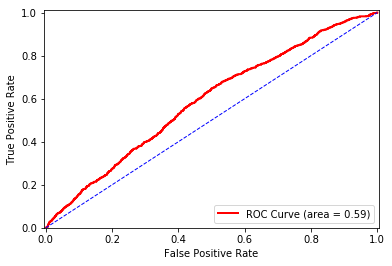

In [20]:
%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr, tpr, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Define X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc="lower right")

plt.show()

## The accuracy for each algorithm that we recorded is reported in table below. Sorted according to the accuracy reported.


       
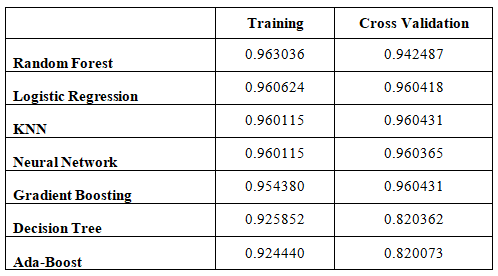



